In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_job_data2.csv")

In [3]:
print(df.shape)

(21901, 16)


In [4]:
df.columns

Index(['Role', 'Title', 'Company', 'Industry Type', 'Department',
       'Employment Type', 'Role Category', 'Experience', 'Salary', 'Location',
       'JD URL', 'Full JD', 'Job ID', 'Required Skills', 'Short Skills',
       'job_description_clean'],
      dtype='object')

In [18]:
df.head()

,Role,Title,Company,Industry Type,Department,Employment Type,Role Category,Experience,Salary,Location,JD URL,Full JD,Job ID,Required Skills,Short Skills,job_description_clean,JD_Length
0,Full Stack Developer,full stack developer - intern/fresher/experienced,gururo,Education / Training,Engineering - Software & QA,"Full Time, Permanent",Software Development,0 Yrs,Unpaid,Vadodara,https://www.naukri.com/job-listings-full-stack...,Description\nLocation: Vadodara\nType: Full-ti...,190625505294,"['analytics', 'front end', 'html', 'internship...",NaN,description location: vadodara type: full-time...,362
1,Full Stack Developer,full stack developer,ey,Management Consulting,Engineering - Software & QA,"Full Time, Permanent",Software Development,3-6 Yrs,12-15 Lacs PA,Hybrid - Hyderabad,https://www.naukri.com/job-listings-full-stack...,Job description\nRole & responsibilities: :\n\...,180625025585,"['angular', 'aws', 'azure', 'full stack', 'jav...","Full Stack,Java,Azure,Ror,Vue,Node.Js,MongoDB,...",job description role responsibilities: : devel...,361
2,Full Stack Developer,full stack developer level ii,zignaai,Analytics / KPO / Research,Other,"Full Time, Permanent",Other,6-8 Yrs,18-20 Lacs PA,Hyderabad(Nacharam),https://www.naukri.com/job-listings-full-stack...,Job description\nRole & responsibilities We ar...,210625012377,"['aws', 'node', 'react.js']","Node,React.Js,AWS,Stack,Full Stack,Level II,De...",job description role responsibilities we are a...,212
3,Full Stack Developer,full stack developer,capgemini,IT Services & Consulting,Engineering - Software & QA,"Full Time, Permanent",Software Development,6-9 Yrs,Not disclosed,Gurugram,https://www.naukri.com/job-listings-full-stack...,Job description\nWorks in the area of Software...,180625916770,"['angular', 'angularjs', 'bootstrap', 'c#', 'c...","Full Stack,c#,rest,css,python,software develop...",job description works in the area of software ...,291
4,Full Stack Developer,full-stack developer,videonetics,Banking,Engineering - Software & QA,"Full Time, Permanent",Software Development,5-8 Yrs,Not disclosed,Kolkata,https://www.naukri.com/job-listings-full-stack...,Job description\nVideonetics Technology Pvt Lt...,200625504578,"['javascript', 'management', 'mongodb', 'python']","Javascript,MongoDB,Management,Python,Full Stac...",job description videonetics technology pvt ltd...,130


In [6]:
df.isnull().sum().sort_values(ascending=False)

Short Skills             153
Role                       0
Title                      0
Company                    0
Industry Type              0
Department                 0
Employment Type            0
Role Category              0
Experience                 0
Salary                     0
Location                   0
JD URL                     0
Full JD                    0
Job ID                     0
Required Skills            0
job_description_clean      0
dtype: int64

<Axes: title={'center': 'Top Job Titles'}, ylabel='Title'>

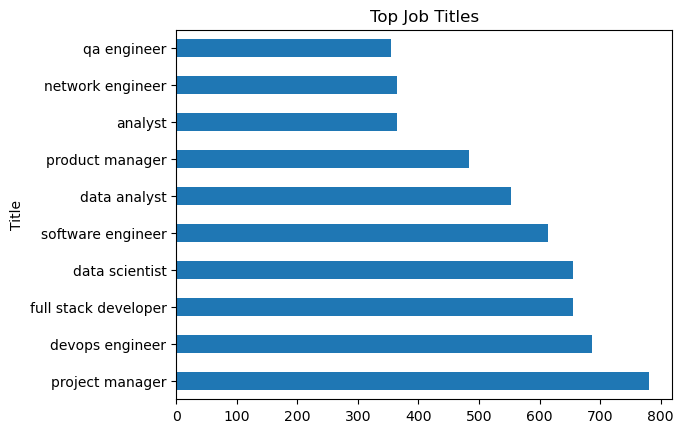

In [7]:
df['Title'].value_counts().head(10).plot(kind='barh', title='Top Job Titles')

<Axes: title={'center': 'Top Job Locations'}, ylabel='Location'>

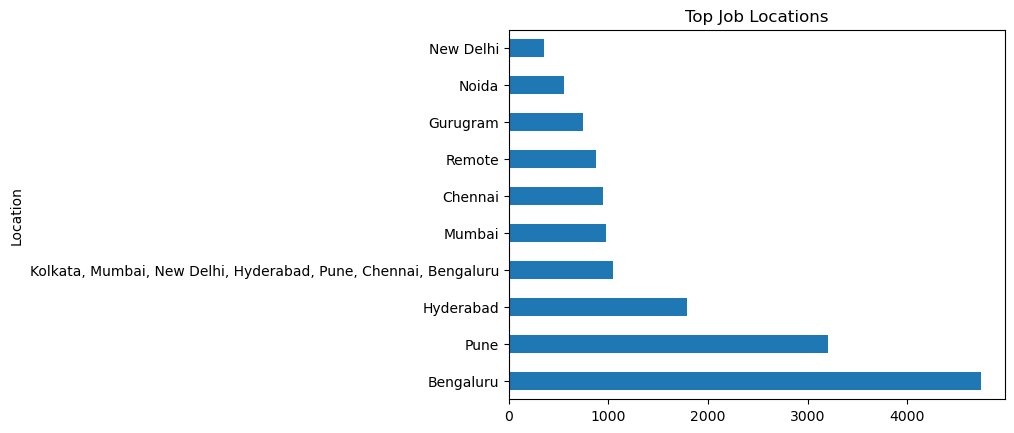

In [9]:
df['Location'].value_counts().head(10).plot(kind='barh', title='Top Job Locations')

<Axes: title={'center': 'Experience Distribution'}, xlabel='Experience'>

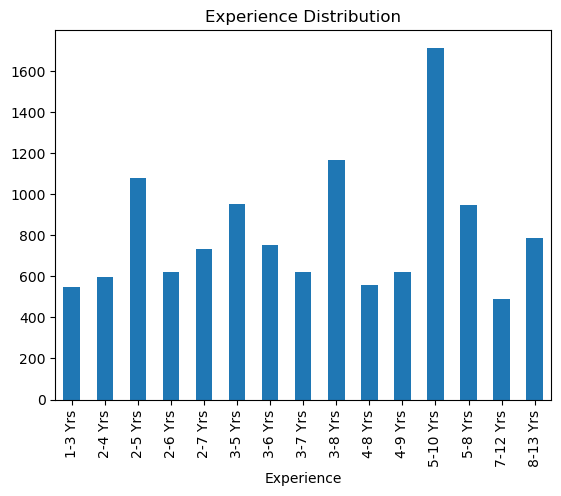

In [10]:
df['Experience'].value_counts().head(15).sort_index().plot(kind='bar', title='Experience Distribution')

In [11]:
df['Salary'].value_counts().head(10)

Salary
Not disclosed    20080
Unpaid             132
15-25 Lacs PA       48
10-20 Lacs PA       43
15-30 Lacs PA       40
20-35 Lacs PA       29
20-30 Lacs PA       29
15-20 Lacs PA       28
5-10 Lacs PA        28
20-25 Lacs PA       27
Name: count, dtype: int64

<Axes: >

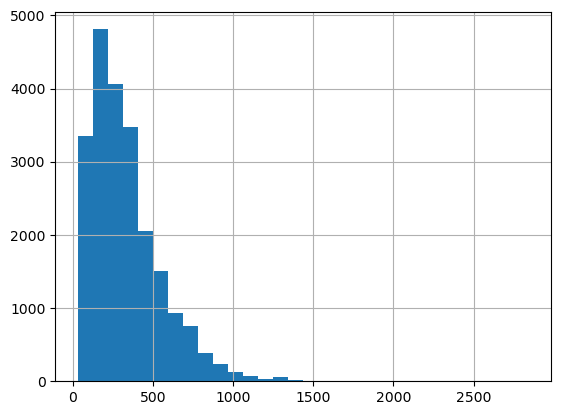

In [8]:
df['JD_Length'] = df['Full JD'].astype(str).apply(lambda x: len(x.split()))
df['JD_Length'].hist(bins=30)

In [13]:
df['JD_Length'] = df['Full JD'].astype(str).apply(lambda x: len(x.split()))



In [9]:
df['JD_Length']

0        362
1        361
2        212
3        291
4        130
        ... 
21896    281
21897     99
21898     88
21899     88
21900     87
Name: JD_Length, Length: 21901, dtype: int64

In [12]:
print(df['Full JD'].iloc[4695])

Job description
https://zrec.in/fZsLy?source=CareerSite
Role: System Security Engineer
Industry Type: IT Services & Consulting
Department: IT & Information Security
Employment Type: Full Time, Permanent
Role Category: IT Security
Education
UG: Any Graduate


In [17]:
str = "MLOps and CI / CD Proficiency: Experience with MLOps practices and version control tools like Git to maintain CI / CD pipelines for efficient model deployment and managementBachelor s / Master s Degree in Engineering,Computer Science,or related fields. . Interest in core programming principles and an understanding of the importance of code structure."

print(len(str.split()))

53


In [29]:
df['JD_Length'].sort_values(ascending=True).head(150)

4695     31
17658    31
19048    34
13937    34
8271     34
         ..
3166     51
15572    51
15217    51
4075     51
10294    51
Name: JD_Length, Length: 150, dtype: int64

In [30]:
from collections import Counter
import ast

df['Required Skills'] = df['Required Skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

all_skills = [skill.strip().lower() for sublist in df['Required Skills'] for skill in sublist]

remove_skills = ['computer science', 'bachelor', 'internship', 'education', 'graduate']


# Step 4: Count skill frequencies
skill_counts = Counter(all_skills)

# Step 5: Convert to DataFrame if you want to view/sort/export
skill_freq_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)
skill_freq_df = skill_freq_df[~skill_freq_df['Skill'].isin(remove_skills)].reset_index(drop=True)

# Show top N skills
print(skill_freq_df.head(10))

                Skill  Frequency
0              python       5628
1                 sql       3612
2               agile       2744
3          javascript       2708
4     troubleshooting       2175
5  project management       2096
6          automation       2030
7               linux       1996
8                 aws       1877
9    machine learning       1812


In [19]:
df['Required Skills']

0        ['analytics', 'front end', 'html', 'internship...
1        ['angular', 'aws', 'azure', 'full stack', 'jav...
2                              ['aws', 'node', 'react.js']
3        ['angular', 'angularjs', 'bootstrap', 'c#', 'c...
4        ['javascript', 'management', 'mongodb', 'python']
                               ...                        
21896    ['asa firewall', 'asa packet flow', 'cisco asa...
21897    ['international technical support', 'it helpde...
21898    ['desktop support', 'international technical s...
21899    ['desktop support', 'international technical s...
21900    ['desktop support', 'it helpdesk', 'l1 support...
Name: Required Skills, Length: 21901, dtype: object

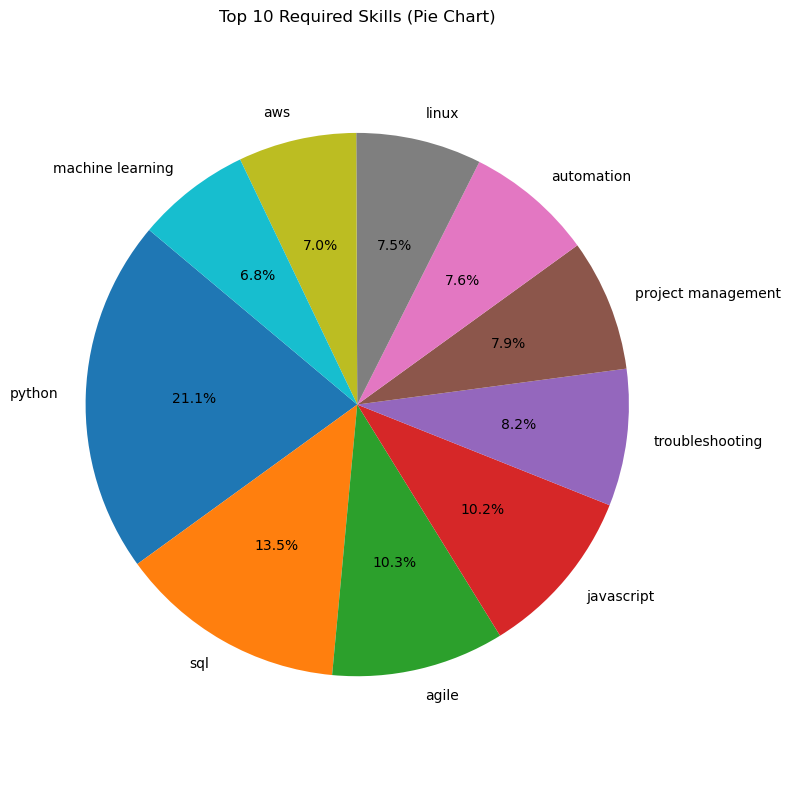

In [33]:
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Step 1: Make sure skills are lists, not strings
df['Required Skills'] = df['Required Skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Flatten and clean
all_skills = [skill.strip().lower() for sublist in df['Required Skills'] for skill in sublist]

# Step 3: Count all skills
skill_counts = Counter(all_skills)

# Step 4: Convert to DataFrame and clean it
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Step 5: Remove unwanted non-skill terms
skill_df = skill_df[~skill_df['Skill'].isin(['computer science'])].reset_index(drop=True)

# Step 6: Get top 10 skills after filtering
top_skills = skill_df.head(10)

# Step 7: Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_skills['Frequency'], labels=top_skills['Skill'], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Required Skills (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()

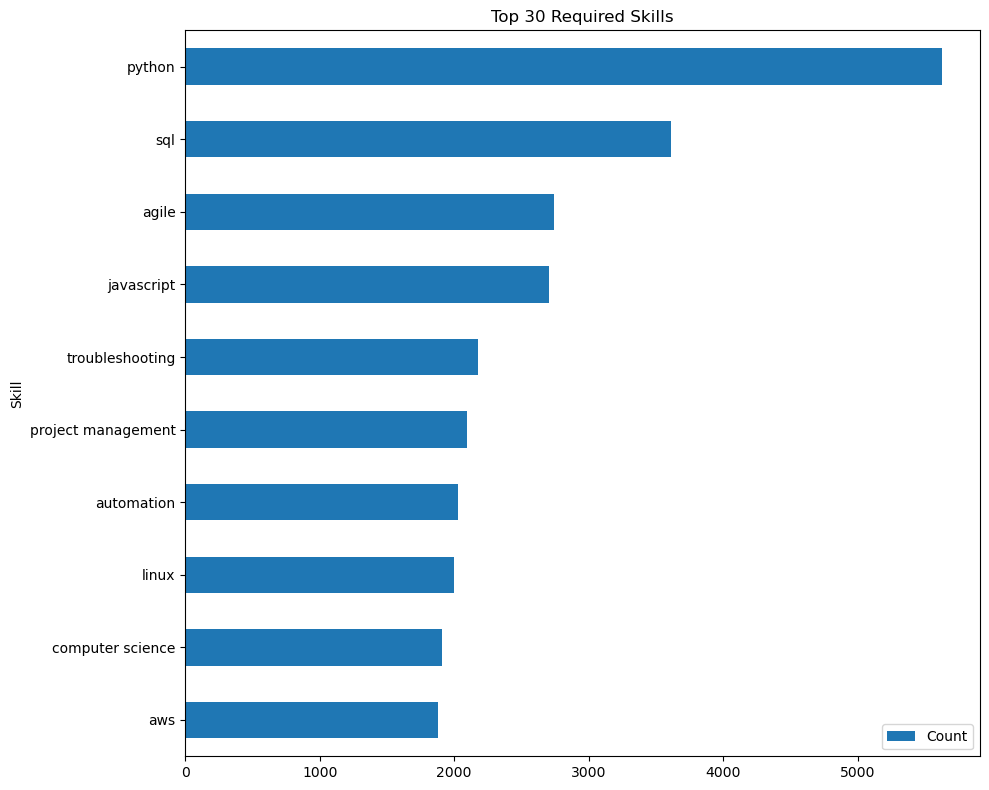

In [26]:
pd.DataFrame(skill_counts, columns=['Skill', 'Count']).set_index('Skill').plot(
    kind='barh',
    figsize=(10, 8),
    title='Top 30 Required Skills'
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

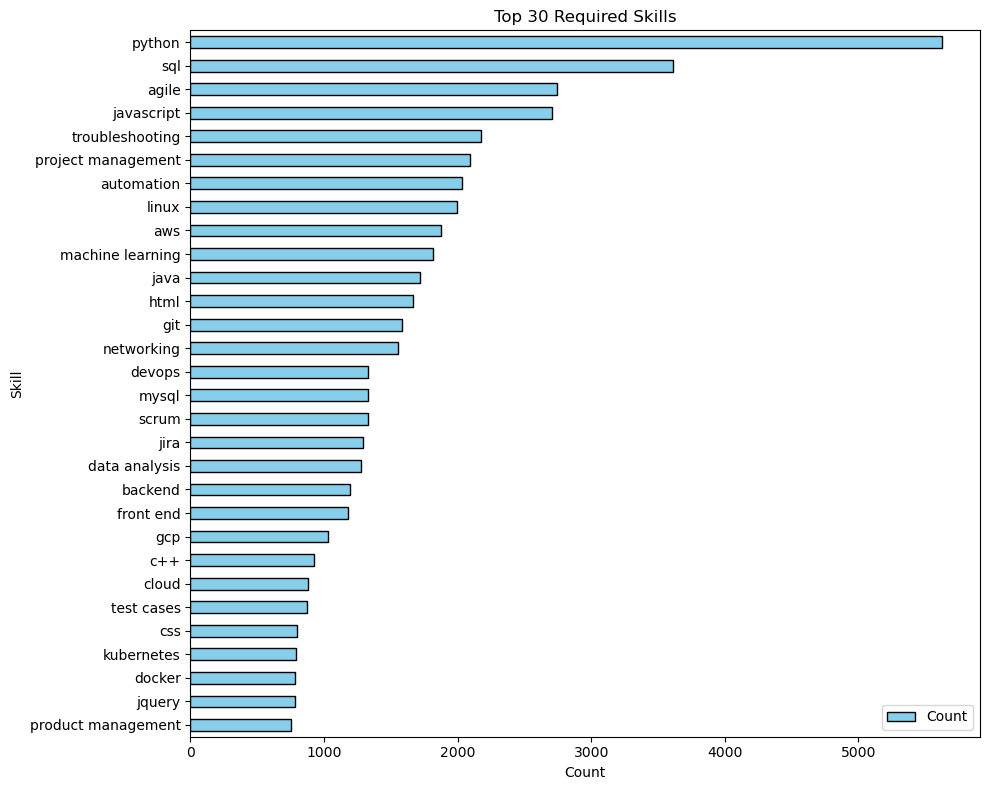

In [9]:
from collections import Counter
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Step 1: Parse skill lists if stored as strings
# df['Required Skills'] = df['Required Skills'].dropna().apply(literal_eval)

# Step 2: Flatten and clean skill names
all_skills = [skill.strip().lower() for sublist in df['Required Skills'] for skill in sublist]

exclude_skills = {'computer science', 'coding', 'debugging', 'performance testing', 'analytical', 'analytics', 'monitoring', 'information technology', 'selenium', 'automation testing'}  # add more if needed

df['Required Skills'] = df['Required Skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

all_skills = [
    skill.strip().lower()
    for sublist in df['Required Skills']
    for skill in sublist
    if skill.strip().lower() not in exclude_skills
]
skill_counts = Counter(all_skills).most_common(30)

# Step 3: Create DataFrame
skill_df = pd.DataFrame(skill_counts, columns=['Skill', 'Count'])

# Step 4: Bar Chart
skill_df.set_index('Skill').plot(
    kind='barh',
    figsize=(10, 8),
    color='skyblue',
    edgecolor='black',
    title='Top 30 Required Skills'
)

# Invert y-axis so top skill is at the top
plt.gca().invert_yaxis()

# Improve layout
plt.xlabel("Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()
